In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
from numpy.fft import fft2, fftshift, ifftshift
import matplotlib.pyplot as plt

# Function to apply phase transformation and compute interference pattern using FFT with padding
def convert_to_interference_phase(image, phase_shift):

    # phase_image = image * np.exp(1j * phase_shift)
    # padded_image = np.pad(phase_image, pad_width=((14, 14), (14, 14)), mode='constant')
    shifted_image = ifftshift(image)

    fft_image = ifftshift(fft2(shifted_image))
    # phase_transformed = np.stack([fft_image.real, fft_image.imag], axis=-1).astype('float32')
    # return phase_transformed
    return fft_image

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

phase_shift = 2 * np.pi / 3

# Apply the phase transformation to all images
train_images_phase = np.array([convert_to_interference_phase(image, phase_shift) for image in train_images])
test_images_phase = np.array([convert_to_interference_phase(image, phase_shift) for image in test_images])

2025-02-17 06:56:18.851722: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-17 06:56:19.451188: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-17 06:56:19.451345: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-17 06:56:19.575140: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-17 06:56:19.791948: I tensorflow/core/platform/cpu_feature_guar

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
test_images.shape

(10000, 28, 28)

In [6]:
train_images_phase.shape

(60000, 28, 28)

In [4]:
idx = 456

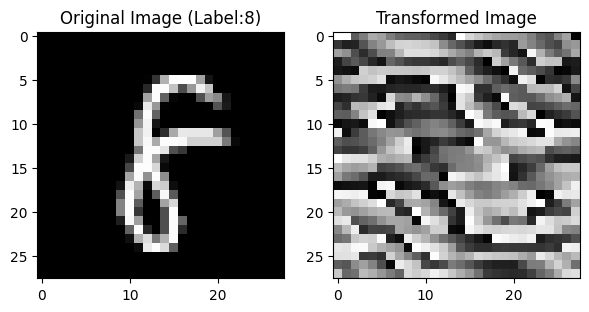

In [12]:
fig, axs = plt.subplots(1,2, figsize = (7,5))
org_img = train_images[idx,:,:].reshape((28,28))
img_phase = np.angle(train_images_phase[idx,:,:])
label = train_labels[idx]

axs[0].imshow(org_img, cmap = 'gray')
axs[0].set_title(f"Original Image (Label:{label})")

axs[1].imshow(img_phase, cmap = 'gray')
axs[1].set_title(f"Phase of the FFT of Image")
plt.show()